### Machine Learning and Contect Analytics

MSc in Business Analytics

Department of Managment Science & Technology

Athens University of Economics and Business

#### Authors
* Alvanou Marianna, ΑΜ: p2822201
* Vlachakis Sotirios, ΑΜ: p2822228

# Model 1 ~ Feed Forward Network

### Loading dataset

In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

%matplotlib inline

In [2]:
df = pd.read_excel("C:\\Users\\mario\\Downloads\\data_cleaning.xlsx" , usecols = ['Brand', 'Comments', 'NPS_Label'])

df.sample(5)

,Brand,Comments,NPS_Label
1822,10,εξαιρετικοι συνεργατεσ,Positive
7536,10,ειλικρινεια γνωση και αμεση ανταποκριση με χαμ...,Positive
7163,7,δεν λύθηκε το πρόβλημα αλλά φέρει ευθύνη ο οτε...,Neutral
10314,9,"αμεσοτητα απαντησησ, ευγενεια εκπροσωπου",Positive
9055,4,ελλειψη αξιοπιστιασ. αναμενω ακομα ενημερωση α...,Negative


In [3]:
def nps_new(nps):
        if nps == 'Positive':
            return 0
        elif nps == 'Neutral':
            return 1
        else:
            return 2

In [4]:
# Net Promoter Score

df['NPS_encoded'] = df['NPS_Label'].apply(nps_new)

#### Splitting Dataset Procedure

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [6]:
x = df['Comments']
y = df['NPS_encoded']

In [7]:
# Split the dataset into train - validation and test

X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y) 

In [8]:
X_train_val.head()

12729    δεν εχει ολοκληρωθει η εγκρισησ που μου επροτα...
648            ευγενικός και εξυπηρετικός ο εκπρόσωπος σας
5939                                   αμεση εξυπηρετηση..
8231                                              ευγενεια
840      η αμεση εξυπηρετηση απο το προσωπικο σασ και η...
Name: Comments, dtype: object

In [9]:
# Split the dataset into Train and Validation

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15,
                                                  random_state=42, stratify=y_train_val)

In [10]:
print(f'X_train_val shape: {X_train_val.shape}')
print(f'y_train_val shape: {y_train_val.shape}')
print()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print()

print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')

print()
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train_val shape: (11941,)
y_train_val shape: (11941,)

X_train shape: (10149,)
y_train shape: (10149,)

X_val shape: (1792,)
y_val shape: (1792,)

X_test shape: (2986,)
y_test shape: (2986,)


In [11]:
import numpy as np
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=np.unique(y_train),
                                                 y=y_train)
class_weights

array([0.43444202, 3.26859903, 2.54935946])

### Label Encoding

In [12]:
# Encoding the labels using a One-Hot Encoder
y_enc = OneHotEncoder(sparse_output=False)
y_enc

OneHotEncoder(sparse_output=False)

In [13]:
y_train_enc = y_enc.fit_transform(y_train.values.reshape(-1, 1))
y_train_enc

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [14]:
y_val_enc = y_enc.transform(y_val.values.reshape(-1, 1))
y_test_enc = y_enc.transform(y_test.values.reshape(-1, 1))

In [15]:
print(f'y_train shape: {y_train_enc.shape}')
print(f'y_val shape: {y_val_enc.shape}')
print(f'y_test shape: {y_test_enc.shape}')

y_train shape: (10149, 3)
y_val shape: (1792, 3)
y_test shape: (2986, 3)


In [16]:
print('Encoder Categories:',y_enc.categories_)

Encoder Categories: [array([0, 1, 2], dtype=int64)]


In [17]:
# What the aforementioned code did:
temp = pd.DataFrame(y_train_enc)
temp.columns = list(y_enc.categories_[0])
temp.head(10)

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


In [18]:
def highlight_ones(s):
    '''
    highlight the number 1 in a Series yellow.
    '''
    is_max = s == 1
    return ['background-color: yellow' if v else '' for v in is_max]

In [19]:
temp.head(10).style.apply(highlight_ones)

,0,1,2
0,1.000000,0.000000,0.000000
1,1.000000,0.000000,0.000000
2,1.000000,0.000000,0.000000
3,1.000000,0.000000,0.000000
4,1.000000,0.000000,0.000000
5,1.000000,0.000000,0.000000
6,1.000000,0.000000,0.000000
7,1.000000,0.000000,0.000000
8,1.000000,0.000000,0.000000
9,1.000000,0.000000,0.000000


In [20]:
temp.sum(axis=0).head(10)

0    7787.0
1    1035.0
2    1327.0
dtype: float64

### Bag of Words

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [22]:
print(df['Comments'].iloc[111])
print(df['Comments'].iloc[320])

γρηγορη εξυπηρετηση. θα ηθελα ομωσ να με καλει μονο ο προσωπικοσ συμβουλοσ η το καταστημα κορινθου για νεα προγραμματα οχι απο ασχετα καταστηματα. την τελευταια φορα που ανανεωσα το προγραμμα δεν εμεινα ευχαριστημενη.
αμεση  εξυπηρετηση


In [23]:
sample_sentences = [
    'αμεση εξυπηρετηση', 
    'ευγενεια -επαγγελματισμοσ',
    'δυσκολευτηκα να βρω τον αρμοδιο εκπροσωπο που θα εκανε την ανανεωση των συμβολαιων',
    'εχουμε συχνες διακοπες στο ιντερνετ αλλα κυριως στο τηλεφ χθεσ πχ η διακοπη κρατησε πανω απο 5 ωρες σημερα ειχα 3 διακοπες του τηλ αλλα για λιγα λεπτα η καθε φορα γενικα η κατασταση απαραδεκτη'
]
sample_sentences

['αμεση εξυπηρετηση',
 'ευγενεια -επαγγελματισμοσ',
 'δυσκολευτηκα να βρω τον αρμοδιο εκπροσωπο που θα εκανε την ανανεωση των συμβολαιων',
 'εχουμε συχνες διακοπες στο ιντερνετ αλλα κυριως στο τηλεφ χθεσ πχ η διακοπη κρατησε πανω απο 5 ωρες σημερα ειχα 3 διακοπες του τηλ αλλα για λιγα λεπτα η καθε φορα γενικα η κατασταση απαραδεκτη']

In [24]:
sample_vect = CountVectorizer()

sample_vect.fit(sample_sentences)

CountVectorizer()

In [25]:
sample_sents_bow = sample_vect.transform(sample_sentences)
# creates a sparse matrix
sample_sents_bow

<4x44 sparse matrix of type '<class 'numpy.int64'>'
	with 44 stored elements in Compressed Sparse Row format>

In [26]:
sample_sents_bow.toarray( ) #find how many times appear each word

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
       [2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]],
      dtype=int64)

In [27]:
sample_vect.vocabulary_ #find the ids of each word

{'αμεση': 1,
 'εξυπηρετηση': 15,
 'ευγενεια': 17,
 'επαγγελματισμοσ': 16,
 'δυσκολευτηκα': 11,
 'να': 27,
 'βρω': 6,
 'τον': 38,
 'αρμοδιο': 5,
 'εκπροσωπο': 14,
 'που': 29,
 'θα': 19,
 'εκανε': 13,
 'την': 37,
 'ανανεωση': 2,
 'των': 40,
 'συμβολαιων': 33,
 'εχουμε': 18,
 'συχνες': 34,
 'διακοπες': 9,
 'στο': 32,
 'ιντερνετ': 20,
 'αλλα': 0,
 'κυριως': 24,
 'τηλεφ': 36,
 'χθεσ': 42,
 'πχ': 30,
 'διακοπη': 10,
 'κρατησε': 23,
 'πανω': 28,
 'απο': 4,
 'ωρες': 43,
 'σημερα': 31,
 'ειχα': 12,
 'του': 39,
 'τηλ': 35,
 'για': 8,
 'λιγα': 26,
 'λεπτα': 25,
 'καθε': 21,
 'φορα': 41,
 'γενικα': 7,
 'κατασταση': 22,
 'απαραδεκτη': 3}

In [28]:
bow_df = pd.DataFrame(sample_sents_bow.todense())
bow_df.columns = sorted(sample_vect.vocabulary_)
bow_df['Original Sentence'] = sample_sentences
bow_df.style.apply(highlight_ones)

,αλλα,αμεση,ανανεωση,απαραδεκτη,απο,αρμοδιο,βρω,γενικα,για,διακοπες,διακοπη,δυσκολευτηκα,ειχα,εκανε,εκπροσωπο,εξυπηρετηση,επαγγελματισμοσ,ευγενεια,εχουμε,θα,ιντερνετ,καθε,κατασταση,κρατησε,κυριως,λεπτα,λιγα,να,πανω,που,πχ,σημερα,στο,συμβολαιων,συχνες,τηλ,τηλεφ,την,τον,του,των,φορα,χθεσ,ωρες,Original Sentence
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,αμεση εξυπηρετηση
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ευγενεια -επαγγελματισμοσ
2,0,0,1,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,δυσκολευτηκα να βρω τον αρμοδιο εκπροσωπο που θα εκανε την ανανεωση των συμβολαιων
3,2,0,0,1,1,0,0,1,1,2,1,0,1,0,0,0,0,0,1,0,1,1,1,1,1,1,1,0,1,0,1,1,2,0,1,1,1,0,0,1,0,1,1,1,εχουμε συχνες διακοπες στο ιντερνετ αλλα κυριως στο τηλεφ χθεσ πχ η διακοπη κρατησε πανω απο 5 ωρες σημερα ειχα 3 διακοπες του τηλ αλλα για λιγα λεπτα η καθε φορα γενικα η κατασταση απαραδεκτη


In [29]:
# A pandas Series is also an iterable. So we can handle it like a List.
# Concatenating all songs into one text.
corpora = " ".join(df)

print(corpora[:1000])

Brand Comments NPS_Label NPS_encoded


In [30]:
top_words = Counter(corpora.split()).most_common()
top_words[:20]

[('Brand', 1), ('Comments', 1), ('NPS_Label', 1), ('NPS_encoded', 1)]

In [31]:
# Printing the top 100 most common words in order to pick those that we want to 
# include in our Stop Words List. 
print(sorted([i[0].lower() for i in top_words[:100]]))

['brand', 'comments', 'nps_encoded', 'nps_label']


In [32]:
# Printing the top 100 most common words in order to pick those that we want to 
# include in our Stop Words List. 
print(sorted([i[0] for i in top_words[:100]]))

['Brand', 'Comments', 'NPS_Label', 'NPS_encoded']


In [33]:
# Creating our custom Greek Stop Words List.
gr_stop = [ ',', 'αν', 'απο', 'από', 'ας', 'αυτο', 'για', 'εγω', 'εσυ', 'ετσι', 'ειμαι', 'ειναι',
           'ειχα', 'ενα', 'εχει', 'εχω', 'η', 'ηταν', 'θα', 'η', 'η', 'ηταν', 'θα', 'και', 'και',
           'κι', 'μα', 'μας', 'με', 'μες', 'μη', 'μην', 'μια', 'μου', 'μου,', 'μ’', 'ν', 'να', 'ο',
           'ο', 'οι', 'ολα', 'οτι','που', 'σασ', 'σε', 'στην', 'στο', 'τα','τη', 'την', 'τησ', 'τισ',
           'το', 'τον', 'του', 'τουσ', 'των' ]

In [34]:
# Total Number of Words to use for vectorization. 
# The vectorizer will keep the K most common tokens (words-characters)
max_words = 500

In [35]:
# This vectorizer will give the number of appearances of each word
counter_vectorizer = CountVectorizer(
    encoding='utf-8',
    strip_accents='unicode',
    lowercase=True,
    stop_words=gr_stop,
    ngram_range=(1, 1), # unigrams  # ngram_range=(1, 2) -> bigrams
    max_features=max_words,
    binary=False # binary output or full counts. 
)
counter_vectorizer

CountVectorizer(max_features=500,
                stop_words=[',', 'αν', 'απο', 'από', 'ας', 'αυτο', 'για', 'εγω',
                            'εσυ', 'ετσι', 'ειμαι', 'ειναι', 'ειχα', 'ενα',
                            'εχει', 'εχω', 'η', 'ηταν', 'θα', 'η', 'η', 'ηταν',
                            'θα', 'και', 'και', 'κι', 'μα', 'μας', 'με', 'μες', ...],
                strip_accents='unicode')

In [36]:
# This vectorizer will give return 0 or 1 based on the appearence of each word
binary_vectorizer = CountVectorizer(
    encoding='utf-8',
    strip_accents='unicode',
    lowercase=True,
    stop_words=gr_stop,
    ngram_range=(1, 1), # unigrams
    max_features=max_words,
    binary=True # binary output or full counts. 
    )
binary_vectorizer

CountVectorizer(binary=True, max_features=500,
                stop_words=[',', 'αν', 'απο', 'από', 'ας', 'αυτο', 'για', 'εγω',
                            'εσυ', 'ετσι', 'ειμαι', 'ειναι', 'ειχα', 'ενα',
                            'εχει', 'εχω', 'η', 'ηταν', 'θα', 'η', 'η', 'ηταν',
                            'θα', 'και', 'και', 'κι', 'μα', 'μας', 'με', 'μες', ...],
                strip_accents='unicode')

In [37]:
X_train

4404                  ευγενια,αποτελεσματικοτητα, ταχυτητα
3264                      ηταν αποτελεσματικη και ευγενικη
9050                                  ειμαι ευχαριστημενοσ
5175     ο τεχνικοσ ηρθε στην ωρα του και εκανε καλη δο...
3395            εξυπηρετηση και ευγενεια του υπαλληλου σασ
                               ...                        
5930                                 πολυ καλη εξυπηρετηση
5921                             εξυπηρετηση και σαφηνεια.
6535                                           εξυπηρετηση
11515                                         εξυπιρετικοι
11605    παντοτε υπαρχει πολυ γρηγορη εξυπηρετηση απο τ...
Name: Comments, Length: 10149, dtype: object

In [38]:
# fitting the CountVectorizer in the training data
X_train_enc = counter_vectorizer.fit_transform(X_train)

In [39]:
X_train_enc.shape

(10149, 500)

In [40]:
# Using the FITTED CountVectorizer we transform the Validation and Test Sets
X_val_enc = counter_vectorizer.transform(X_val)
X_test_enc = counter_vectorizer.transform(X_test)

In [41]:
print(f'X_train encoded shape: {X_train_enc.shape}')
print(f'X_val encoded shape: {X_val_enc.shape}')
print(f'X_test encoded shape: {X_test_enc.shape}')

X_train encoded shape: (10149, 500)
X_val encoded shape: (1792, 500)
X_test encoded shape: (2986, 500)


In [42]:
X_train_enc

<10149x500 sparse matrix of type '<class 'numpy.int64'>'
	with 35971 stored elements in Compressed Sparse Row format>

In [43]:
X_train_enc[0].todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

### Model Building

In [44]:
#  pip install tensorflow

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import metrics
from tensorflow.keras.utils import plot_model
import pydot

In [46]:
y_enc.categories_

[array([0, 1, 2], dtype=int64)]

In [47]:
from keras.callbacks import ModelCheckpoint

# Calculate the number of sentiments
nb_classes = len(y_enc.categories_[0])
print(f'Number of sentiments: {nb_classes}')

# Checkpoint - save the model's weights during training if the validation accuracy improves
checkpoint= ModelCheckpoint(filepath='C:\\Users\\mario\\Downloads\\FFNN_model.h5',mode='max',
                            monitor='val_accuracy',verbose=2,save_best_only=True)
print('Building model...', end='\n\n')

# Create a sequential model
model = Sequential()

# Add a dense layer (MLP) with input shape
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(rate=0.4))

# Add another dense layer (MLP)
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(rate=0.4))

# Add a dense layer for classification
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# Print model summary
print(model.summary())


Number of sentiments: 3
Building model...

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               256512    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Den

In [48]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

### Fitting the Model

In [49]:
import tensorflow as tf

# Create an EarlyStopping callback - if it doesn't improve for 2 consecutive epochs, the training will stop early.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)

# Use the callbacks during model training
callbacks = [early_stopping, checkpoint]  # Combine the two callbacks into a list

history = model.fit(x=X_train_enc.todense(),
                    y=y_train_enc,
                    batch_size=32,
                    epochs=10,
                    verbose=2,
                    validation_data=(X_val_enc.todense(), y_val_enc),
                    callbacks=callbacks, 
                    class_weight={0: 0.43444202, 1: 3.26859903,2: 2.54935946}
                    )

Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.67355, saving model to C:\Users\mario\Downloads\FFNN_model.h5
318/318 - 5s - loss: 0.8760 - accuracy: 0.6386 - val_loss: 0.7349 - val_accuracy: 0.6735 - 5s/epoch - 17ms/step
Epoch 2/10


C:\Users\mario\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy improved from 0.67355 to 0.76004, saving model to C:\Users\mario\Downloads\FFNN_model.h5
318/318 - 4s - loss: 0.7336 - accuracy: 0.6785 - val_loss: 0.6511 - val_accuracy: 0.7600 - 4s/epoch - 12ms/step
Epoch 3/10

Epoch 3: val_accuracy did not improve from 0.76004
318/318 - 4s - loss: 0.6385 - accuracy: 0.7081 - val_loss: 0.7797 - val_accuracy: 0.6959 - 4s/epoch - 12ms/step
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.76004
318/318 - 4s - loss: 0.5670 - accuracy: 0.7344 - val_loss: 0.7438 - val_accuracy: 0.6975 - 4s/epoch - 12ms/step


### Plot Loss and Accuracy

In [50]:
def plot_keras_history(history):
    """
    
    :param history: 
    :return: 
    """
    # the history object gives the metrics keys. 
    # we will store the metrics keys that are from the training sesion.
    metrics_names = [key for key in history.history.keys() if not key.startswith('val_')]

    for i, metric in enumerate(metrics_names):
        
        # getting the training values
        metric_train_values = history.history.get(metric, [])
        
        # getting the validation values
        metric_val_values = history.history.get("val_{}".format(metric), [])

        # As loss always exists as a metric we use it to find the 
        epochs = range(1, len(metric_train_values) + 1)
        
        # leaving extra spaces to allign with the validation text
        training_text = "   Training {}: {:.5f}".format(metric,
                                                        metric_train_values[-1])

        # metric
        plt.figure(i, figsize=(6, 6))

        plt.plot(epochs,
                 metric_train_values,
                 'b',
                 label=training_text)
        
        # if we validation metric exists, then plot that as well
        if metric_val_values:
            validation_text = "Validation {}: {:.5f}".format(metric,
                                                             metric_val_values[-1])

            plt.plot(epochs,
                     metric_val_values,
                     'g',
                     label=validation_text)
        
        # add title, xlabel, ylabe, and legend
        plt.title('Model Metric: {}'.format(metric))
        plt.xlabel('Epochs')
        plt.ylabel(metric.title())
        plt.legend()

    plt.show()

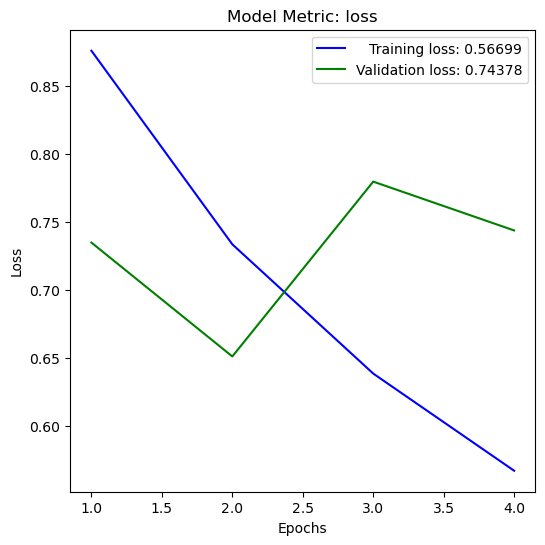

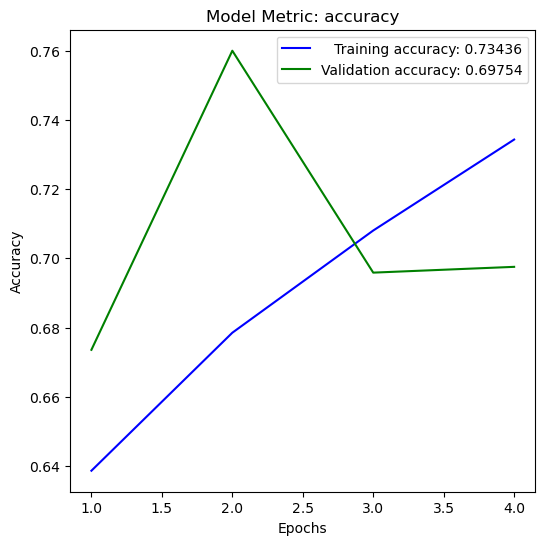

In [51]:
plot_keras_history(history) #το validation set κανει overfit

### AUC

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

#AUC
y_predicted = model.predict(X_test_enc)
roc_auc_score(y_test_enc,y_predicted) 

94/94 [==============================] - 0s 3ms/step


0.7928954697474749

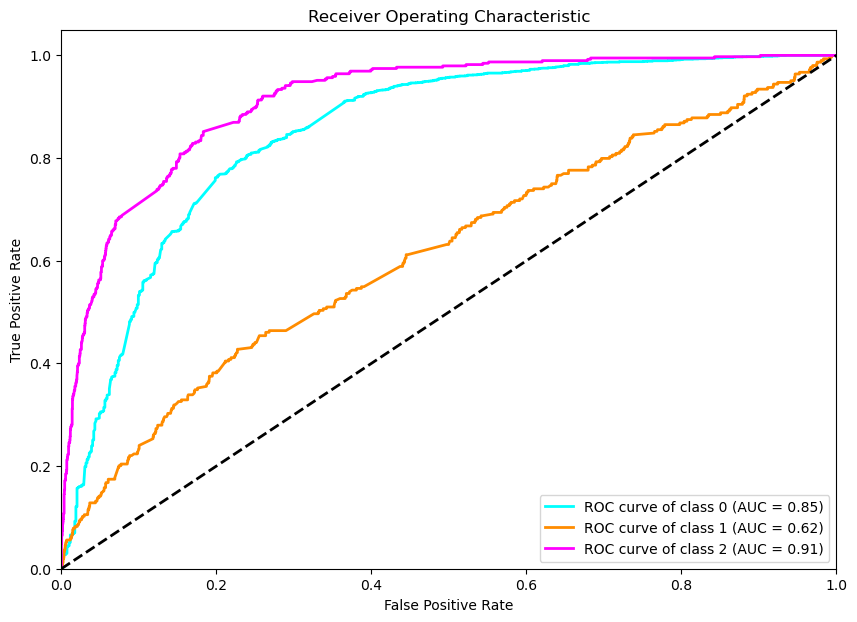

In [53]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()

for i in range(nb_classes): 
    fpr[i], tpr[i], _ = roc_curve(y_test_enc[:, i], y_predicted[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_enc.ravel(), y_predicted.ravel())
roc_auc_dict["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class
plt.figure(figsize=(10, 7))
colors = cycle(['aqua', 'darkorange', 'magenta'])

for i, color in zip(range(nb_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:.2f})'.format(i, roc_auc_dict[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [54]:
import keras
Model_MLP = keras.models.load_model('C:\\Users\\mario\\Downloads\\FFNN_model.h5') #importing the model from the checkpoint

In [55]:
# saving the model to json format
open('model_FFNN.json', 'w').write(model.to_json())

2606

In [56]:
# saving the weights of the model separately
model.save_weights('weights_Model1.h5')

### Model Evaluation

In [57]:
# evaluate and store on score variable on the Test dataset
score = model.evaluate(X_test_enc.todense(), y_test_enc,
                       batch_size=32,
                       verbose=2
                      )

94/94 - 1s - loss: 0.7475 - accuracy: 0.6946 - 507ms/epoch - 5ms/step


In [58]:
print('\nTest categorical_crossentropy: {:.3f} %'.format(score[0]*100))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))


Test categorical_crossentropy: 74.752 %

Test accuracy: 69.457 %


### Model Prediction

In [59]:
# Use to yield probability distribution over the categories
y_test_pred_probs = model.predict(X_test_enc)
y_test_pred_probs

94/94 [==============================] - 0s 3ms/step


array([[0.6227425 , 0.20279303, 0.17446452],
       [0.39476368, 0.42434135, 0.18089502],
       [0.2355648 , 0.28128478, 0.48315045],
       ...,
       [0.68911844, 0.27855864, 0.03232284],
       [0.2456289 , 0.29035836, 0.46401274],
       [0.6325733 , 0.34438145, 0.02304518]], dtype=float32)

In [60]:
y_test_pred_probs.shape

(2986, 3)

In [61]:
# Use to yield the predicted classes.

y_test_preds = np.argmax(model.predict(X_test_enc), axis=-1)

y_test_preds[:50]

94/94 [==============================] - 0s 3ms/step


array([0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2,
       0, 0, 1, 0, 0, 2], dtype=int64)

In [62]:
# custom prediction function 
def get_one_hot_predictions(pred_probs):
    """
    """
    max_probs = np.max(pred_probs, axis=1)
    
    # reshaping to (len_of_predicts, 1)
    max_probs = max_probs.reshape(max_probs.shape[0], 1)

    return np.equal(pred_probs, max_probs).astype(float)

In [63]:
y_test_pred = get_one_hot_predictions(y_test_pred_probs)
y_test_pred

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [64]:
# Now, we will use the fitted One Hot Encoder to Inverse Tranform the ouput
y_test_pred_sentiment = y_enc.inverse_transform(y_test_pred).flatten()
y_test_pred_sentiment[:40]

array([0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1], dtype=int64)

### Confusion Matrix

C:\Users\mario\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


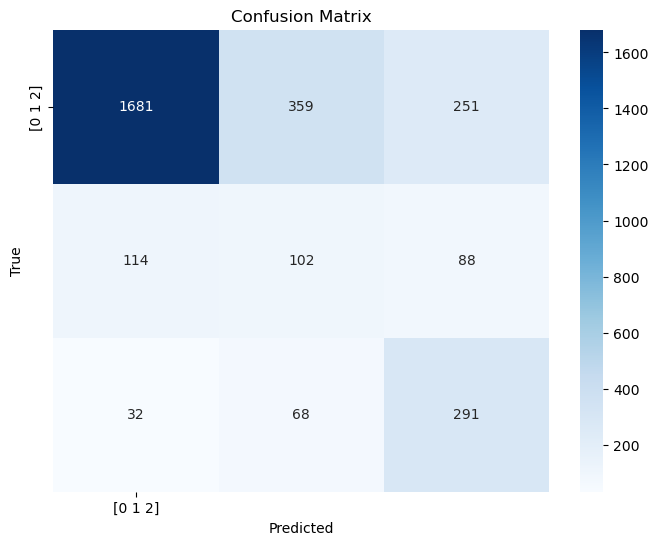

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

conf_mat = confusion_matrix(y_true=y_test,
                            y_pred=y_test_pred_sentiment)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_enc.categories_,
            yticklabels=y_enc.categories_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [66]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred_sentiment))

              precision    recall  f1-score   support

           0       0.92      0.73      0.82      2291
           1       0.19      0.34      0.24       304
           2       0.46      0.74      0.57       391

    accuracy                           0.69      2986
   macro avg       0.52      0.60      0.54      2986
weighted avg       0.79      0.69      0.73      2986

